In [29]:
import pandas as pd
import os
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


In [2]:
# Trying to set the seed
np.random.seed(0)
import random
random.seed(0)

# Reading file into data frame
cwd = os.getcwd()
filename = cwd + '/CreditCard.xls'
nanDict = {}
df = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)


In [3]:
df.rename(index=str, columns={"default payment next month": "defaultPaymentNextMonth"}, inplace=True)

# Features and targets 
X = df.loc[:, df.columns != 'defaultPaymentNextMonth'].values
y = df.loc[:, df.columns == 'defaultPaymentNextMonth'].values

In [4]:
# Categorical variables to one-hot's
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] 


C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [5]:
# Train-test split
trainingShare = 0.5 
seed  = 1
XTrain, XTest, yTrain, yTest=train_test_split(X, y, train_size=trainingShare, \
                                              test_size = 1-trainingShare,
                                             random_state=seed)

In [6]:
# Input Scaling
sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

In [7]:
# One-hot's of the target vector
Y_train_onehot, Y_test_onehot = to_categorical(yTrain), to_categorical(yTest)

In [8]:
df = df.drop(df[(df.BILL_AMT1 == 0) &
                (df.BILL_AMT2 == 0) &
                (df.BILL_AMT3 == 0) &
                (df.BILL_AMT4 == 0) &
                (df.BILL_AMT5 == 0) &
                (df.BILL_AMT6 == 0) &
                (df.PAY_AMT1 == 0) &
                (df.PAY_AMT2 == 0) &
                (df.PAY_AMT3 == 0) &
                (df.PAY_AMT4 == 0) &
                (df.PAY_AMT5 == 0) &
                (df.PAY_AMT6 == 0)].index)

df = df.drop(df[(df.BILL_AMT1 == 0) &
                (df.BILL_AMT2 == 0) &
                (df.BILL_AMT3 == 0) &
                (df.BILL_AMT4 == 0) &
                (df.BILL_AMT5 == 0) &
                (df.BILL_AMT6 == 0)].index)

df = df.drop(df[(df.PAY_AMT1 == 0) &
                (df.PAY_AMT2 == 0) &
                (df.PAY_AMT3 == 0) &
                (df.PAY_AMT4 == 0) &
                (df.PAY_AMT5 == 0) &
                (df.PAY_AMT6 == 0)].index)

# Descriptive information
print('Number of empty elements in data: ', df.isnull().values.any())
print('Observations: ', df.shape[0])
print('Percentage defaults: ', df['defaultPaymentNextMonth'].astype(bool).sum(axis=0)/df.shape[0]*100)

Number of empty elements in data:  False
Observations:  28497
Percentage defaults:  21.31452433589501


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lmbdas=np.logspace(-5,7,13)
parameters = [{'C': 1./lmbdas}]
scoring = ['accuracy', 'roc_auc']
logReg = LogisticRegression()
gridSearch = GridSearchCV(logReg, parameters, cv=5, scoring=scoring, refit='roc_auc') 
# "refit" gives the metric used deciding best model. 
# See more http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
gridSearch.fit(XTrain, yTrain.ravel())

C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': array([1.e+05, 1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07])}],
       pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score='warn',
       scoring=['accuracy', 'roc_auc'], verbose=0)

In [10]:
def gridSearchSummary(method, scoring):
    """Prints best parameters from Grid search
    and AUC with standard deviation for all 
    parameter combos """
    
    method = eval(method)
    if scoring == 'accuracy':
        mean = 'mean_test_score'
        sd = 'std_test_score'
    elif scoring == 'auc':
        mean = 'mean_test_roc_auc'
        sd = 'std_test_roc_auc'
    print("Best: %f using %s" % (method.best_score_, method.best_params_))
    means = method.cv_results_[mean]
    stds = method.cv_results_[sd]
    params = method.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

gridSearchSummary('gridSearch', 'auc')

Best: 0.723594 using {'C': 0.1}
0.723494 (0.008033) with: {'C': 99999.99999999999}
0.723494 (0.008033) with: {'C': 10000.0}
0.723495 (0.008032) with: {'C': 1000.0}
0.723495 (0.008033) with: {'C': 100.0}
0.723496 (0.008036) with: {'C': 10.0}
0.723518 (0.008049) with: {'C': 1.0}
0.723594 (0.008033) with: {'C': 0.1}
0.723440 (0.007838) with: {'C': 0.01}
0.717568 (0.007688) with: {'C': 0.001}
0.705035 (0.007697) with: {'C': 0.0001}
0.699007 (0.007833) with: {'C': 1e-05}
0.698128 (0.007831) with: {'C': 1e-06}
0.698044 (0.007811) with: {'C': 1e-07}


In [39]:
def createConfusionMatrix(method, printOut=True):
        """
        Computes and prints confusion matrices, accuracy scores,
        and AUC for test and training sets 
        """
        confusionArray = np.zeros(6, dtype=object)
        method = eval(method)

        # Train
        yPredTrain = method.predict(XTrain)
        yPredTrain = (yPredTrain > 0.5)
        cm = confusion_matrix(
            yTrain, yPredTrain) 
        cm = np.around(cm/cm.sum(axis=1)[:,None], 2)
        confusionArray[0] = cm

        accScore = accuracy_score(yTrain, yPredTrain)
        confusionArray[1] = accScore

        AUC = roc_auc_score(yTrain, yPredTrain)
        confusionArray[2] = AUC

        if printOut:
            print('\n###################  Training  ###############')
            print('\nTraining Confusion matrix: \n', cm)
            print('\nTraining Accuracy score: \n', accScore)
            print('\nTrain AUC: \n', AUC)

        # Test
        yPred = method.predict(XTest)
        yPred = (yPred > 0.5)
        cm = confusion_matrix(
            yTest, yPred) 
        cm = np.around(cm/cm.sum(axis=1)[:,None], 2)
        confusionArray[3] = cm

        accScore = accuracy_score(yTest, yPred)
        confusionArray[4] = accScore

        AUC = roc_auc_score(yTest, yPred)
        confusionArray[5] = AUC

        if printOut:
            print('\n###################  Testing  ###############')
            print('\nTest Confusion matrix: \n', cm)
            print('\nTest Accuracy score: \n', accScore)
            print('\nTestAUC: \n', AUC)    

        return confusionArray


   

(15000,) (15000, 2)


C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Milos\Anaconda3\envs\python2.7\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.


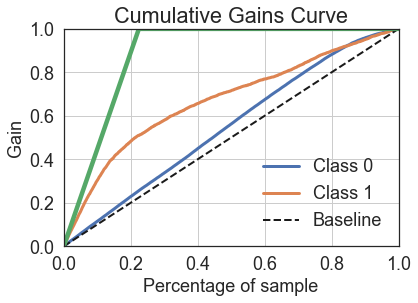

NameError: name 'fig' is not defined

In [43]:
    confusionArrayLogreg = createConfusionMatrix('gridSearch', printOut=False)
    import matplotlib.pyplot as plt
    import seaborn
    import scikitplot as skplt
    from scikitplot import metrics

    seaborn.set(style="white", context="notebook", font_scale=1.5, 
                rc={"axes.grid": True, "legend.frameon": False,
    "lines.markeredgewidth": 1.4, "lines.markersize": 10})
    seaborn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 4.5})

    yPred = gridSearch.predict_proba(XTest) 
    print(yTest.ravel().shape, yPred.shape)
    skplt.metrics.plot_cumulative_gain(yTest.ravel(), yPred)

    defaults = sum(yTest == 1)
    total = len(yTest)
    defaultRate = defaults/total
    def bestCurve(defaults, total, defaultRate):
        x = np.linspace(0, 1, total)

        y1 = np.linspace(0, 1, defaults)
        y2 = np.ones(total-defaults)
        y3 = np.concatenate([y1,y2])
        return x, y3

    x, best = bestCurve(defaults=defaults, total=total, defaultRate=defaultRate)    
    plt.plot(x, best)    

    plt.show()
    
    